In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sns


In [3]:
df = pd.read_csv('E:/Drive E/Projects/Data/data.csv')

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
print('No. of columns and rows repectively : ', df.shape)

No. of columns and rows repectively :  (2200, 8)


In [8]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
# Fill-NA function is used to replace these missing values with statistical values such as Mean, Median or Mode.
# NA means Not available 
# Pandas have functions like fill - NA, drop -NA to treat missing values

In [12]:
df['label'].value_counts()  # Let understands crop present in the dataset

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [16]:
print('Average Ratio Of Nitrogen In the Soil : ', df['N'].mean())
print('Average Ratio Of Phosphorous In the Soil : ', df['P'].mean())
print('Average Ratio Of Potessium In the Soil : ', df['K'].mean())
print('Average temperature in Celsius: ', df['temperature'].mean())
print('Average Relative Humidity in % : ', df['humidity'].mean())
print('Average PH Value of the soil: ', df['ph'].mean())
print('Average Rainfall in mm: ', df['rainfall'].mean())

Average Ratio Of Nitrogen In the Soil :  50.551818181818184
Average Ratio Of Phosphorous In the Soil :  53.36272727272727
Average Ratio Of Potessium In the Soil :  48.14909090909091
Average temperature in Celsius:  25.616243851779544
Average Relative Humidity in % :  71.48177921778637
Average PH Value of the soil:  6.469480065256364
Average Rainfall in mm:  103.46365541576817


In [17]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [23]:
# for interactivity
from ipywidgets import interact

In [36]:
# Lets check the summary Statistics for each of the Crops

@interact
def summary(crops = list(df['label'].value_counts().index)):
    x = df[df['label'] ==  crops]
    
    print('________________________________________________________')
    print('Statistics for nitrogen :')
    print('Minimum Nitrogen Required: ',x['N'].min())
    print('Average Nitrogen Required: ',x['N'].mean())
    print('Maximum Nitrogen Required: ',x['N'].max())
    
    
    print('--------------------------------------------------------')
    print('Statistics for Phasphorous :')
    print('Minimum Phasphorous Required: ',x['P'].min())
    print('Average Phasphorous Required: ',x['P'].mean())
    print('Maximum Phasphorous Required: ',x['P'].max())
    
    print('--------------------------------------------------------')
    print('Statistics for Potassium :')
    print('Minimum Potassium Required: ',x['K'].min())
    print('Average Potassium Required: ',x['K'].mean())
    print('Maximum Potassium Required: ',x['K'].max())
          
    print('__________________________________________________________')
    print('Statistics for Temperature :')
    print('Minimum Temperature Required: ',x['temperature'].min())
    print('Average Temperature Required: ',x['temperature'].mean())
    print('Maximum Temperature Required: ',x['temperature'].max())
    
    print('--------------------------------------------------------------')
    print('Statistics for Humidity :')
    print('Minimum Humidity Required: ',x['humidity'].min())
    print('Average Humidity Required: ',x['humidity'].mean())
    print('Maximum Humidity Required: ',x['humidity'].max())
    
    print('---------------------------------------------------------------')
    print('Statistics for PH :')
    print('Minimum PH Required: ',x['ph'].min())
    print('Average PH Required: ',x['ph'].mean())
    print('Maximum PH Required: ',x['ph'].max())
    
          

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [20]:
df['label'].value_counts().index

Index(['rice', 'maize', 'jute', 'cotton', 'coconut', 'papaya', 'orange',
       'apple', 'muskmelon', 'watermelon', 'grapes', 'mango', 'banana',
       'pomegranate', 'lentil', 'blackgram', 'mungbean', 'mothbeans',
       'pigeonpeas', 'kidneybeans', 'chickpea', 'coffee'],
      dtype='object')

In [37]:
df.shape

(2200, 8)

In [40]:
x = df.iloc[:, 0:7]

In [41]:
x.shape

(2200, 7)

In [42]:
y = df.iloc[:, -1]

In [43]:
y.shape

(2200,)

In [78]:
# lets compare the Average Requirement for each crops with average conditions

@interact
def compare(condition = ['N', 'P', 'K', 'temperature', 'ph', 'humidity',  'rainfall'] ):
    print('Average Value for ', condition, 'is ', format(df[condition].mean()))
    
    print('------------------------------------------')
    print('Rice ', format(df[(df['label'] == 'rice')][condition].mean()))

    print('Black Grams ', format(df[(df['label'] == 'blackgram')][condition].mean()))
    
    print('Banana ', format(df[(df['label'] == 'banana')][condition].mean()))
    
    print('Jute ', format(df[(df['label'] == 'jute')][condition].mean()))
    
    print('Coconut ', format(df[(df['label'] == 'coconut')][condition].mean()))
    
    print('Apple ', format(df[(df['label'] == 'apple')][condition].mean()))
    
    print('Papaya ', format(df[(df['label'] == 'papaya')][condition].mean()))
    
    print('Muskmelon ', format(df[(df['label'] == 'muskmelon')][condition].mean()))
    
    print('Grapes ', format(df[(df['label'] == 'grapes')][condition].mean()))
    
    print('Watermelon ', format(df[(df['label'] == 'watermelon')][condition].mean()))
    
    print('Kidneybeans ', format(df[(df['label'] == 'kidneybeans')][condition].mean()))
    
    print('Mung Beans ', format(df[(df['label'] == 'mungbean')][condition].mean()))
    
    print('Oranges ', format(df[(df['label'] == 'orange')][condition].mean()))
    
    print('Chick Peas ', format(df[(df['label'] == 'chickpea')][condition].mean()))
    
    print('Lentils ', format(df[(df['label'] == 'lentil')][condition].mean()))
    
    print('Cotton ', format(df[(df['label'] == 'cotton')][condition].mean()))
    
    print('Maize ', format(df[(df['label'] == 'maize')][condition].mean()))
    
    print('Moth Beans ', format(df[(df['label'] == 'mothbeans')][condition].mean()))
    
    print('Pigeon Peas ', format(df[(df['label'] == 'pigeonpeas')][condition].mean()))
    
    print('Mango ', format(df[(df['label'] == 'mango')][condition].mean()))
    
    print('Pomegranate ', format(df[(df['label'] == 'pomegranate')][condition].mean()))
    
    print('Coffee ', format(df[(df['label'] == 'coffee')][condition].mean()))

interactive(children=(Dropdown(description='condition', options=('N', 'P', 'K', 'temperature', 'ph', 'humidity…

In [81]:
# lets make this function more intutive

@interact
def compare(condition  = ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print('Crops which require greater than average ', condition , '\n')
    print(df[df[condition] > df[condition].mean()]['label'].unique())
    
    print('----------------------------------------------------')
    print('Crops which require less than average ', condition, '\n')
    print(df[df[condition] < df[condition].mean()]['label'].unique())
   #  print(df[df[condtion] > df[condition].mean()].unique())

interactive(children=(Dropdown(description='condition', options=('N', 'P', 'K', 'temperature', 'ph', 'humidity…

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

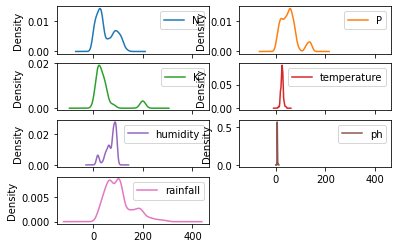

In [84]:
df.plot(subplots =  True, layout = (4, 2), kind = 'kde')

In [93]:
# Lets understand which crops can only be be Grown in Summer Season, Winter Season and Rainy Season

print('Summer Crops')
print(df[(df['temperature'] > 30) & (df['humidity'] > 50)] ['label'].unique())

print('---------------------------------------------------------------------')
print('Winter Crops')
print(df[(df['temperature'] < 20) & (df['humidity'] > 30)] ['label'].unique())

print('---------------------------------------------------------------------')
print('Rainy Season')
print(df[ (df['rainfall'] > 200)  & (df['humidity'] > 30)] ['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
---------------------------------------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
---------------------------------------------------------------------
Rainy Season
['rice' 'papaya' 'coconut']


In [100]:
from sklearn.cluster import KMeans

# removing the labels column
x = df.drop(['label'], axis = 1)

# selecting all the values of the data
x = x.values

# checking the shape
x.shape

(2200, 7)

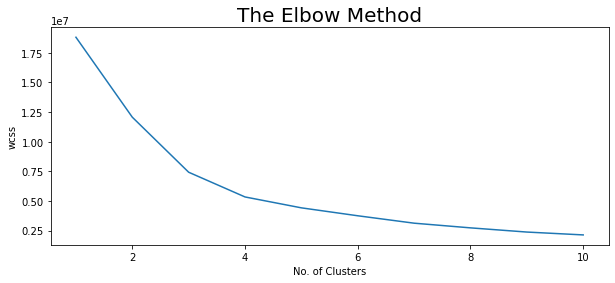

In [103]:
# Lets Determine the Optimum Number of Clusters within the Dataset

plt.rcParams['figure.figsize'] = (10, 4 )

wcss = []
for i in range(1 , 11) :
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append (km.inertia_)
    
# let plot the results
plt.plot(range(1 , 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [135]:
# lets implement the K means algorithm to perform Clustering analysis
km = KMeans (n_clusters  = 4, init = 'k-means++', max_iter = 300, n_init =  10, random_state = 0)
y_means = km.fit_predict(x)


# Lets find out the Results
a = df['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0 : 'cluster'})

# lets Check the cluster of each crops

print('Lets Check the result after applying the K means Clustering Analysis \ n')
print('Crops in First cluster:  ' , z[z['cluster'] == 0]['label'].unique())

print('--------------------------------------------------------------------')
print('Crops in second cluster:  ' , z[z['cluster'] == 1]['label'].unique())

print('--------------------------------------------------------------------')
print('Crops in third cluster:  ' , z[z['cluster'] == 3]['label'].unique())



Lets Check the result after applying the K means Clustering Analysis \ n
Crops in First cluster:   ['grapes' 'apple']
--------------------------------------------------------------------
Crops in second cluster:   ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
--------------------------------------------------------------------
Crops in third cluster:   ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']


In [95]:
df['rainfall'].max()

298.5601175

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size = 0.30, random_state = 42)

In [46]:
x_train.shape

(1540, 7)

In [47]:
y_train.shape

(1540,)

In [50]:
x_test.shape

(660, 7)

In [51]:
y_test.shape

(660,)

In [55]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [106]:
from sklearn.linear_model import LogisticRegression

In [109]:
lg = LogisticRegression()

In [112]:
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test)


c:\users\bhushan sharma\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [114]:
print(accuracy_score(y_test, y_pred))

0.9484848484848485


In [115]:
print(confusion_matrix(y_test, y_pred))

[[34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 22  0  0  0  0  0  0  0  2  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 27  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0 30  0  0  0  0  0  0  0  0  2  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 20  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  4  0  1  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  0  0  0 28  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        34
      banana       0.96      1.00      0.98        26
   blackgram       0.76      0.85      0.80        26
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        33
      coffee       0.97      1.00      0.98        30
      cotton       0.87      0.96      0.92        28
      grapes       1.00      1.00      1.00        23
        jute       0.83      0.88      0.86        34
 kidneybeans       1.00      0.97      0.99        36
      lentil       0.91      0.91      0.91        22
       maize       0.95      0.77      0.85        26
       mango       0.97      1.00      0.98        32
   mothbeans       0.90      0.82      0.86        34
    mungbean       0.94      1.00      0.97        30
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        25
      papaya       0.94    

In [117]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [123]:
prediction = lg.predict((np.array([    [90,
                                        41,
                                        42,
                                        20.879,
                                        80.002,
                                        6.506,
                                        200.2635]])))

print('The Suggested Crop for given Climatic Condition is : ' , prediction)

The Suggested Crop for given Climatic Condition is :  ['rice']
